<a href="https://colab.research.google.com/github/sahithipunya/spunyasa_Hands-on-assignment2/blob/main/spunyasa_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HANDS-ON SESSION-II: DATA MINING TOOLS**

**CLASSIFICATION MODELS**

importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

Upload the file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NY-House-Dataset.csv to NY-House-Dataset.csv


Import the data using pandas

In [3]:
house_data=pd.read_csv('/content/NY-House-Dataset.csv')
house_data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Look for any missing values

In [4]:
missing=house_data.isnull().sum()
missing

,0
BROKERTITLE,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
ADDRESS,0
STATE,0
MAIN_ADDRESS,0
ADMINISTRATIVE_AREA_LEVEL_2,0


Calculating the median price from the PRICE column,
Creates a new column, Price_Category, where each price is categorized as 1 (high price) if it is above or equal to the median, and 0 (low price) if it is below the median.

In [5]:
median_price = house_data['PRICE'].median()
house_data['Price_Category'] = house_data['PRICE'].apply(lambda x: 1 if x >= median_price else 0)

In [6]:
X = house_data[['BEDS', 'BATH', 'PROPERTYSQFT']]
y = house_data['Price_Category']

Filling any missing values in X with the median of each column.

In [7]:
X.fillna(X.median(), inplace=True)

<ipython-input-7-eed314ce733d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Split the Data into Training and Testing Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creates a Logistic Regression model with a maximum of 100 iterations

In [9]:
logistic_model = LogisticRegression(max_iter=100, random_state=42)

In [10]:
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [11]:
y_pred = logistic_model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       717
           1       0.81      0.76      0.78       724

    accuracy                           0.79      1441
   macro avg       0.79      0.79      0.79      1441
weighted avg       0.79      0.79      0.79      1441



In [13]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[584 133]
 [173 551]]


Logistic Regression showed balanced performance with an accuracy of 78%, a slight advantage in recall for class 1, but a somewhat balanced precision across both classes.

**Decision Tree Model**

In [14]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
596,0,1
4507,1,0
3049,1,1
2957,1,1
8,0,0
...,...,...
2669,0,0
3094,1,1
2658,1,1
2809,1,1


In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [16]:
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       717
           1       0.75      0.86      0.80       724

    accuracy                           0.79      1441
   macro avg       0.79      0.79      0.78      1441
weighted avg       0.79      0.79      0.78      1441



In [17]:
# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[509 208]
 [100 624]]


The Decision Tree performed slightly better than Logistic Regression with an accuracy of 79%. It had high recall for class 1 but lower recall for class 0, indicating it was better at identifying high-price instances.

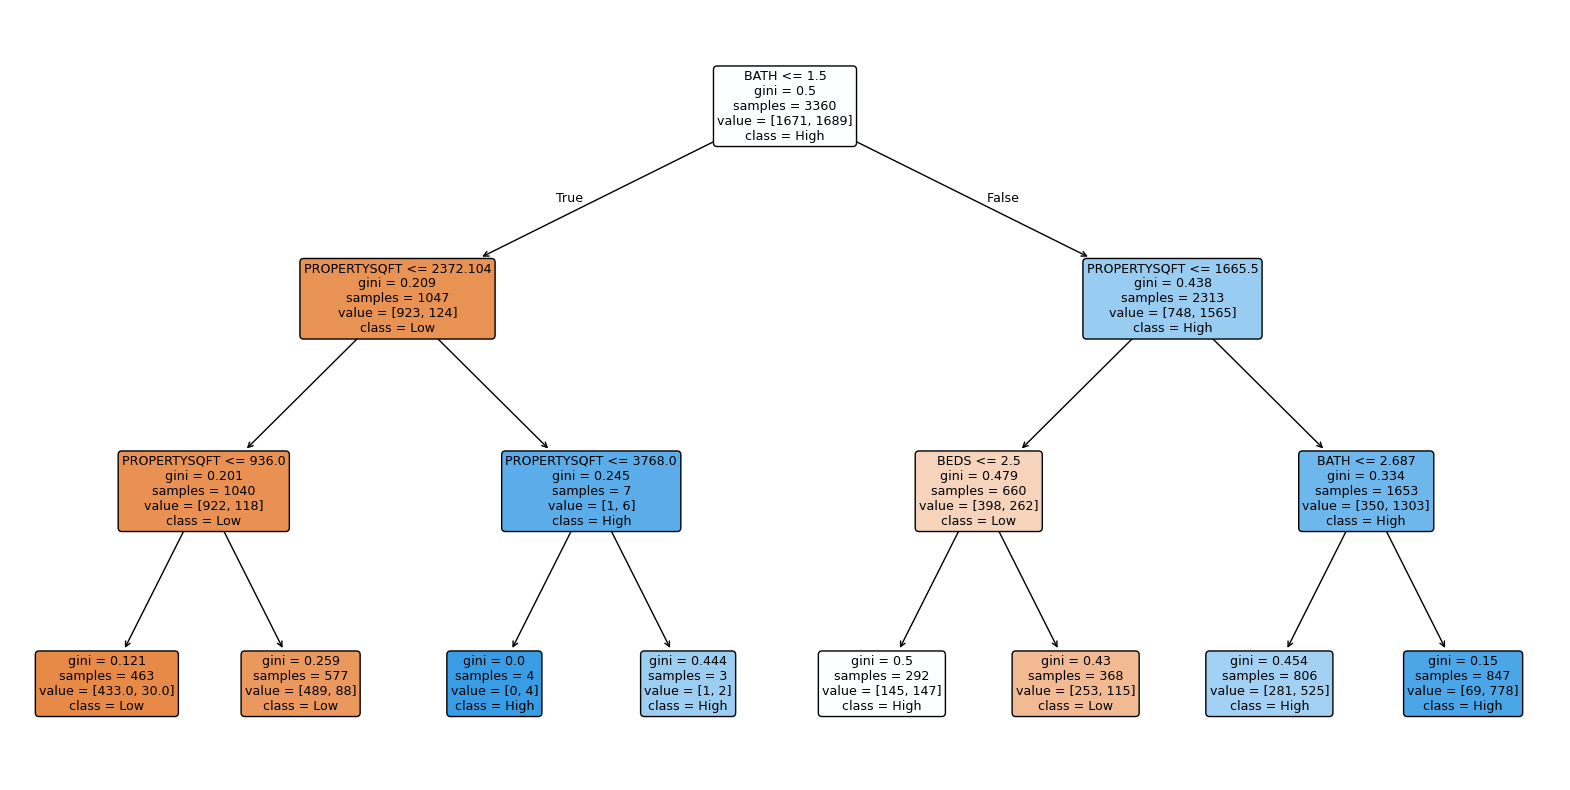

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree,
               feature_names=X_train.columns,
               class_names=['Low', 'High'],
               filled=True,
               rounded=True)
plt.show()

**Random Forest Model**

In [ ]:
# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [ ]:
# Get feature importances from the model
feature_importances = random_forest.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
# Sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df


,Feature,Importance
2,PROPERTYSQFT,0.559877
1,BATH,0.280561
0,BEDS,0.159561


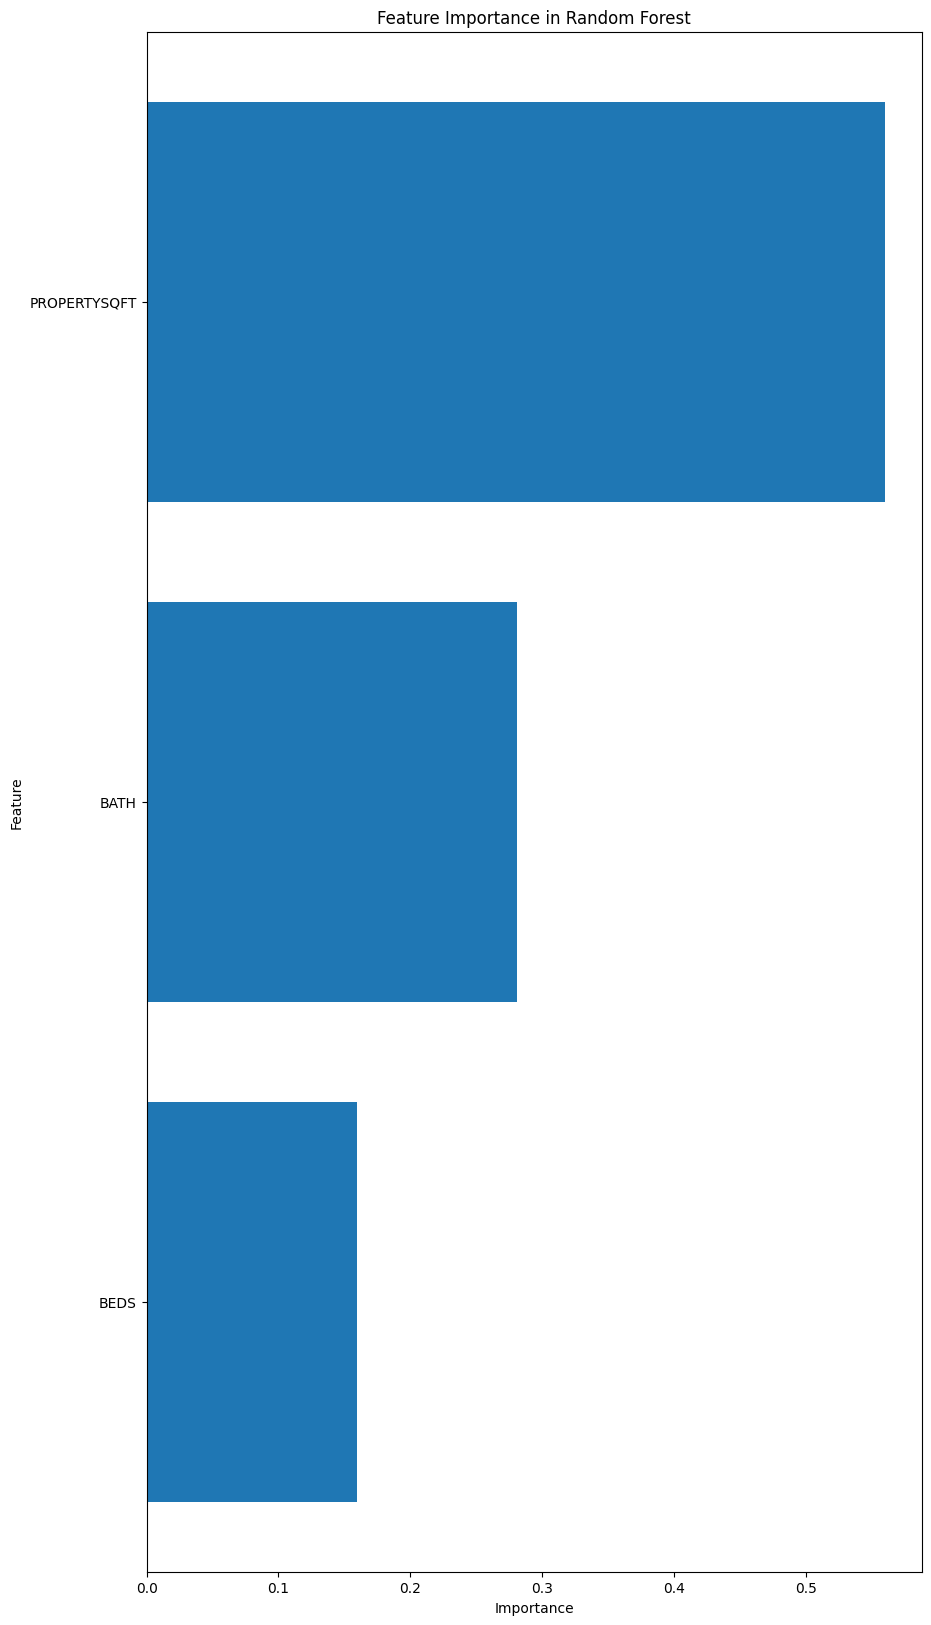

In [ ]:
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


In [ ]:
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       717
           1       0.78      0.79      0.79       724

    accuracy                           0.78      1441
   macro avg       0.78      0.78      0.78      1441
weighted avg       0.78      0.78      0.78      1441



In [ ]:
# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[557 160]
 [152 572]]


Random Forest showed similar performance to Logistic Regression, with balanced metrics across precision, recall, and F1-score. Its accuracy was 78%, but it didn’t significantly outperform other models.

**Gradient Boosting Classifier Model**

In [ ]:
# Initialize the GradientBoostingClassifier
gbm = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages (trees)
    learning_rate=0.05,    # Step size for updating weights (lower values make learning slower)
    max_depth=5,           # Maximum depth of individual trees
    random_state=42
)
# Fit the model on the training data
gbm.fit(X_train, y_train)
# Predict on the testing set
y_pred = gbm.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [ ]:
# Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       717
           1       0.77      0.85      0.81       724

    accuracy                           0.80      1441
   macro avg       0.80      0.80      0.80      1441
weighted avg       0.80      0.80      0.80      1441



In [ ]:
# Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[533 184]
 [109 615]]


Gradient Boosting was the best-performing model with an accuracy of 80% and balanced F1-scores across both classes. It achieved high recall for class 1, meaning it accurately captured high-price instances.

**KNN Model**

In [ ]:
# Step 1: Select relevant features (numerical columns for PCA and KNN)
features = ['BEDS', 'BATH', 'PROPERTYSQFT']
X = house_data[features].fillna(house_data[features].median())  # Fill missing values with median

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 3: Apply PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df.head()

,Principal Component 1,Principal Component 2
0,-0.598768,-0.017536
1,6.467501,3.927492
2,-0.004529,-0.109562
3,-0.882918,-0.379902
4,3.326551,3.797775


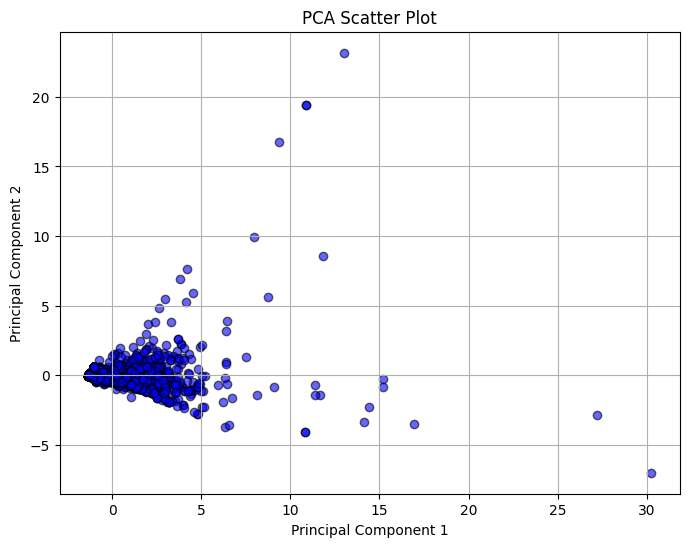

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

In [ ]:
# Initialize the K-Nearest Neighbors model
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
# Fit the model on the training data
knn_model.fit(X_train, y_train)
# Predict the neighbors for the test set (as distances)
y_pred = knn_model.predict(X_test)
print("KNN applied in unsupervised manner to inspect neighbor relationships.")

KNN applied in unsupervised manner to inspect neighbor relationships.


In [ ]:
# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       717
           1       0.79      0.75      0.77       724

    accuracy                           0.77      1441
   macro avg       0.77      0.77      0.77      1441
weighted avg       0.77      0.77      0.77      1441

Confusion Matrix:
 [[572 145]
 [183 541]]


KNN had the lowest accuracy at 77%. It performed better for class 0 in recall, but lower recall for class 1 indicates it struggled with high-price instances.

In [ ]:
# Define a range of k values to test
k_values = range(1, 20)
accuracy_scores = []

# Loop through each k value, train the model, and evaluate with cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use cross-validation to evaluate the model for each k
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    # Append the mean accuracy score for each k
    accuracy_scores.append(scores.mean())

# Find the k value with the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")

Best k value: 17


In [ ]:
k = 17
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       717
           1       0.77      0.80      0.79       724

    accuracy                           0.78      1441
   macro avg       0.78      0.78      0.78      1441
weighted avg       0.78      0.78      0.78      1441

Confusion Matrix:
 [[543 174]
 [142 582]]


**CONCLUSION**

**Best Model:** Gradient Boosting with an accuracy of 80%, as it consistently captured both high and low-price instances effectively with balanced metrics.

**Worst Model:** K-Nearest Neighbors (KNN), which had the lowest accuracy (77%) and struggled with recall for high-price instances